# The process of analyzing data
When analyzing data in Python, you’ll typically go through 3 steps:

1.Getting the data. You’ll need to find a reliable source to get up to date data from.

2.Data cleanup and transformation. Once you have the data, you’ll have to massage the data a little. This mean cleaning up the data, extracting the data that is relevant for you, and making sure it’s in a format that you can use in the next step.

3.Presentation and visualization. This last step means showing the data in a good format. Typically you iterate a bit between steps 2 and 3, since as you’re looking at data, you’ll find out new data points you’ll want to extract from it.

Step 1: Getting the data
There’s a number of places to get data about COVID-19. 
There is a COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University hosted on Github. I realize that’s a mouthful in terms of title. This GitHub repo contains frequently updated data about COVID-19 related infections and deaths worldwide, with special datasets for the US.    

Here, we're using the following two datasets:

1..time_series_covid19_confirmed_US.csv

2..time_series_covid19_deaths_US.csv

To import the datasets into the Jupyter notebook, you can use to following Python code:

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

The previous couple of lines are import statements to import the necessary libraries in Python. Afterwards, we created two objects, cases and deaths that represent the raw datasets, loaded into a Pandas Dataframe.

In [3]:
#With the data imported,
#you can have a look at the data using the following commands:
print(cases.head(10))
print(deaths.head())

        UID iso2 iso3  code3    FIPS    Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0   Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0   Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0   Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0      Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0    Blount        Alabama             US   
5  84001011   US  USA    840  1011.0   Bullock        Alabama             US   
6  84001013   US  USA    840  1013.0    Butler        Alabama             US   
7  84001015   US  USA    840  1015.0   Calhoun        Alabama             US   
8  84001017   US  USA    840  1017.0  Chambers        Alabama             US   
9  84001019   US  USA    840  1019.0  Cherokee        Alabama             US   

         Lat      Long_  ... 10/20/22  10/21/22  10/22/22  10/23/22  10/24/22  \
0  32.539527 -86.644082  ...    18480 

# Step 2: Data cleanup and transformation
Next, we’ll do cleanup of the data. I’ll walk you through the invidual steps and what they mean first for the cases object, and then show you how you can do all of this in a single command for the deaths object.

First up: here we are interested in data from California. Filtering out California in the process will  make the data transformation work lower intensity on the compute and also because the US has duplicate county names. To filter to only data in California, you can use this code:

In [4]:
cases_CA = cases[cases["Province_State"] == "California"]

In [5]:
cases_CA

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/20/22,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22
197,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,369165,369165,369165,369165,369165,370247,370247,370249,370250,370250
198,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,...,137,137,137,137,137,137,137,137,137,137
199,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,...,10955,10955,10955,10955,10955,10968,10968,10968,10967,10967
200,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,...,48685,48685,48685,48685,48685,48785,48785,48787,48788,48788
201,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,...,9100,9100,9100,9100,9100,9120,9120,9120,9120,9120
202,84006011,US,USA,840,6011.0,Colusa,California,US,39.178820,-122.233173,...,5092,5092,5092,5092,5092,5098,5098,5103,5108,5108
203,84006013,US,USA,840,6013.0,Contra Costa,California,US,37.919235,-121.928953,...,272458,272458,272458,272458,272458,273134,273134,273135,273138,273138
204,84006015,US,USA,840,6015.0,Del Norte,California,US,41.742283,-123.897406,...,7854,7854,7854,7854,7854,7859,7859,7859,7859,7859
205,84006017,US,USA,840,6017.0,El Dorado,California,US,38.779660,-120.523317,...,36745,36745,36745,36745,36745,36815,36815,36815,36819,36819
206,84006019,US,USA,840,6019.0,Fresno,California,US,36.757339,-119.646695,...,306769,306769,306769,306769,306769,307191,307191,306776,306776,306776


If you look at the data, you’ll notice that the dates are actually columns in this dataset. It would be easier to work with the data if the dates were rows, which we can do by transposing the data. Transposing means turning rows into columns and columns into rows.

Before transposing, we are  going to introduce one additional step: setting the index of the current dataframe to the county name. This will in turn have the effect of turning the county name into the column header in the transposed dataset. This is how you would do both steps in Python:

In [6]:
cases_CA_indexed = cases_CA.set_index("Admin2")
cases_CA_T = cases_CA_indexed.T

In [7]:
cases_CA_indexed

,UID,iso2,iso3,code3,FIPS,Province_State,Country_Region,Lat,Long_,Combined_Key,...,10/20/22,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22
Admin2,,,,,,,,,,,,,,,,,,,,,
Alameda,84006001,US,USA,840,6001.0,California,US,37.646294,-121.892927,"Alameda, California, US",...,369165,369165,369165,369165,369165,370247,370247,370249,370250,370250
Alpine,84006003,US,USA,840,6003.0,California,US,38.596786,-119.822359,"Alpine, California, US",...,137,137,137,137,137,137,137,137,137,137
Amador,84006005,US,USA,840,6005.0,California,US,38.445831,-120.656960,"Amador, California, US",...,10955,10955,10955,10955,10955,10968,10968,10968,10967,10967
Butte,84006007,US,USA,840,6007.0,California,US,39.667278,-121.600525,"Butte, California, US",...,48685,48685,48685,48685,48685,48785,48785,48787,48788,48788
Calaveras,84006009,US,USA,840,6009.0,California,US,38.205371,-120.552913,"Calaveras, California, US",...,9100,9100,9100,9100,9100,9120,9120,9120,9120,9120
Colusa,84006011,US,USA,840,6011.0,California,US,39.178820,-122.233173,"Colusa, California, US",...,5092,5092,5092,5092,5092,5098,5098,5103,5108,5108
Contra Costa,84006013,US,USA,840,6013.0,California,US,37.919235,-121.928953,"Contra Costa, California, US",...,272458,272458,272458,272458,272458,273134,273134,273135,273138,273138
Del Norte,84006015,US,USA,840,6015.0,California,US,41.742283,-123.897406,"Del Norte, California, US",...,7854,7854,7854,7854,7854,7859,7859,7859,7859,7859
El Dorado,84006017,US,USA,840,6017.0,California,US,38.779660,-120.523317,"El Dorado, California, US",...,36745,36745,36745,36745,36745,36815,36815,36815,36819,36819


In [8]:
#f you were to have a look at the data now,
#you’ll notice that there’s a number of rows now before we get actual case data.
#To see this happen, you can use the following command in a cell in your notebook:

cases_CA_T

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
UID,84006001,84006003,84006005,84006007,84006009,84006011,84006013,84006015,84006017,84006019,...,84006099,84006101,84006103,84006105,84006107,84006109,84090006,84006111,84006113,84006115
iso2,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
iso3,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
code3,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
FIPS,6001,6003,6005,6007,6009,6011,6013,6015,6017,6019,...,6099,6101,6103,6105,6107,6109,90006,6111,6113,6115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/25/22,370247,137,10968,48785,9120,5098,273134,7859,36815,307191,...,159859,26895,16767,1791,158666,16593,4370,225603,52158,20736
10/26/22,370247,137,10968,48785,9120,5098,273134,7859,36815,307191,...,159859,26895,16767,1791,158666,16593,4370,225603,52158,20736
10/27/22,370249,137,10968,48787,9120,5103,273135,7859,36815,306776,...,160059,26895,16767,1791,158668,16593,4358,225608,52161,20736
10/28/22,370250,137,10967,48788,9120,5108,273138,7859,36819,306776,...,160096,26895,16768,1790,158675,16592,4360,225607,52174,20736


To drop these rows, you can use the following command:

In [9]:
cases_clean = cases_CA_T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key'])

And this gives us a clean dataframe to work with for visualization.

All of these steps can be executed as a single command in Python. An example on how this can be done with the deaths object is shown here:

In [10]:
deaths_clean = deaths[deaths["Province_State"] == "California"].set_index("Admin2").T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key']).drop("Population",axis=0)

This is a pretty long statement, but it optimizes a bit of memory usage since you don’t store all the intermediate objects.

Now that we have the raw data, we can start making plots with it! 

Step 3: Presentation and visualization
In this step, we’ll create a first couple of graphs. We want to visualize the data for the 4 counties nearest to California. 
To do this, we’ll use the following object to refer to the counties I want to visualize:

In [11]:
counties = ['Alameda',
             'San Francisco',
             'San Mateo',
             'Santa Clara']

To show the cases in these 4 counties in a graph, we can use the following code:

Text(0.5, 1.0, 'COVID-19 cases in Bay Area Counties')

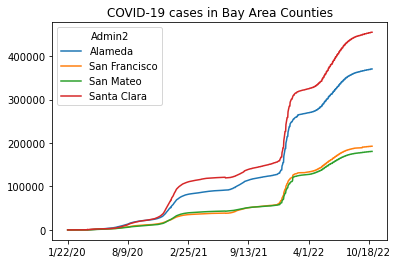

In [12]:
plot = cases_clean[counties].plot()
plot.set_title("COVID-19 cases in Bay Area Counties")

Let’s create a similar graph for the deaths, 
but make this graph a little bigger

Text(0.5, 1.0, 'COVID-19 deaths in Bay Area Counties')

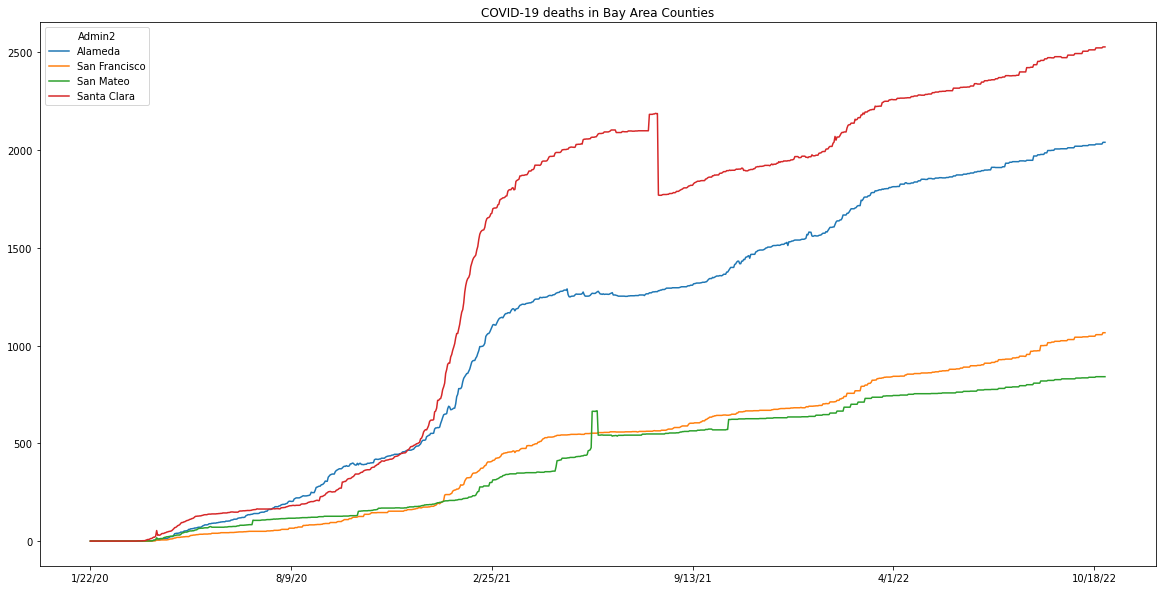

In [13]:
plot = deaths_clean[counties].plot(figsize=(20,10))
plot.set_title("COVID-19 deaths in Bay Area Counties")

Both graphs show a troubling sign. Cases and deaths are going up. However, it’s hard to see how much this is increasing. Also, it’s hard to compare counties, since these numbers are absolute numbers and not expressed in cases per million inhabitants. Let’s start another step 2, and do some more data prep, now to include rolling averages of new cases and generate data per million inhabitants.

# Revisit step 2: including rolling averages of new cases/deaths and data per million inhabitants
In order to generate rolling averages of new cases/deaths, we’ll have to do two things:

Subtract each row by the previous one (to get the increase). We can use the diff() function on the dataframe for this.
Create a rolling average over the new dataset. We can use the rolling() function to create a rolling windows and then use the mean() function to create the average.
This can be done with the following code:

In [14]:
cases_diff = cases_clean.diff().rolling(window=7).mean()
deaths_diff = deaths_clean.diff().rolling(window=7).mean()

In order to generate the data per million inhabitants, we’ll first need to know the amount of inhabitants per county. 

In [15]:
pop = pd.read_csv('https://gist.githubusercontent.com/NillsF/7923a8c7f27ca98ec75b7e1529f259bb/raw/3bedefbe2e242addba3fb47cbcd239fbed16cd54/california.csv')

In [16]:
pop.head()


,CTYNAME,Pop,GrowthRate
0,Los Angeles County,10105518,2.8820
1,San Diego County,3343364,7.7356
2,Orange County,3185968,5.6160
3,Riverside County,2450758,11.3145
4,San Bernardino County,2171603,6.4037


There’s one issue however with these county names. They contain the word “county”, whereas the dataset from CCSE does not have the word “county”. Let’s remove the word county from the pop dataframe:

In [17]:
pop["CTYNAME"] = pop["CTYNAME"].str.replace(" County", "")

In [18]:
pop

,CTYNAME,Pop,GrowthRate
0,Los Angeles,10105518,2.8820
1,San Diego,3343364,7.7356
2,Orange,3185968,5.6160
3,Riverside,2450758,11.3145
4,San Bernardino,2171603,6.4037
5,Santa Clara,1937570,8.4818
6,Alameda,1666753,10.1590
7,Sacramento,1540975,8.4114
8,Contra Costa,1150215,9.2780
9,Fresno,994400,6.6881


We’ll also drop the GrowthRate out of the dataframe, and set the index to the county name:

In [19]:
pop2 = pop.drop('GrowthRate',axis=1).set_index('CTYNAME')

In [20]:
pop2

,Pop
CTYNAME,
Los Angeles,10105518
San Diego,3343364
Orange,3185968
Riverside,2450758
San Bernardino,2171603
Santa Clara,1937570
Alameda,1666753
Sacramento,1540975
Contra Costa,1150215


In [21]:
# now, we can adjust the numbers in the cases and death dataframes.

cases_pm = cases_clean.copy()
for c in pop2.index.tolist():
    cases_pm[c] = cases_pm[c]/pop2.loc[c , : ]['Pop']
cases_pm = cases_pm*1000000



In [22]:
cases_pm

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/25/22,222137,124432,278496,210957,199991,235724,237463,282413,193074,308921,...,290751,277821,262329,142880,340587,304241,4370000000,265114,236643,265706
10/26/22,222137,124432,278496,210957,199991,235724,237463,282413,193074,308921,...,290751,277821,262329,142880,340587,304241,4370000000,265114,236643,265706
10/27/22,222138,124432,278496,210965,199991,235955,237464,282413,193074,308504,...,291114,277821,262329,142880,340591,304241,4358000000,265120,236657,265706
10/28/22,222138,124432,278470,210970,199991,236186,237467,282413,193095,308504,...,291182,277821,262344,142800,340606,304223,4360000000,265118,236716,265706


In [23]:
deaths_pm = deaths_clean.copy()
for c in pop2.index.tolist():
    deaths_pm[c] = deaths_pm[c]/pop2.loc[c , : ]['Pop']
deaths_pm = deaths_pm*1000000

In [24]:
deaths_pm

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/25/22,1218.54,0,2386.82,1971.84,2960.4,1017.25,1255.42,2012.36,1216.71,2909.29,...,3246.55,2406.85,3269.92,1595.53,3305.71,3593.76,0,1857.89,1569.82,1665.79
10/26/22,1218.54,0,2386.82,1971.84,2960.4,1017.25,1255.42,2012.36,1216.71,2909.29,...,3246.55,2406.85,3269.92,1595.53,3305.71,3593.76,0,1857.89,1569.82,1665.79
10/27/22,1223.94,0,2386.82,1976.16,2938.47,1017.25,1267.59,2012.36,1211.47,2909.29,...,3246.55,2406.85,3285.56,1595.53,3307.85,3593.76,0,1860.24,1583.43,1704.23
10/28/22,1223.94,0,2386.82,1976.16,2938.47,1017.25,1267.59,2012.36,1211.47,2909.29,...,3246.55,2406.85,3285.56,1595.53,3307.85,3593.76,0,1860.24,1583.43,1704.23


In [25]:
# let’s create two final objects, that will show the cases and deaths per million increase.

cases_pm_diff = cases_pm.diff().rolling(window=7).mean()
deaths_pm_diff = deaths_pm.diff().rolling(window=7).mean()

Quick summary of this section:

We created objects to represent case and death increases with a 7 day rolling average.
We created objects to represent cases and death per million.
We created objects to represent case and death per million increases with a 7 day rolling average.
Now that we have these objects, let’s do some more plotting:

Text(0.5, 1.0, '7 day moving avg of new COVID-19 cases ')

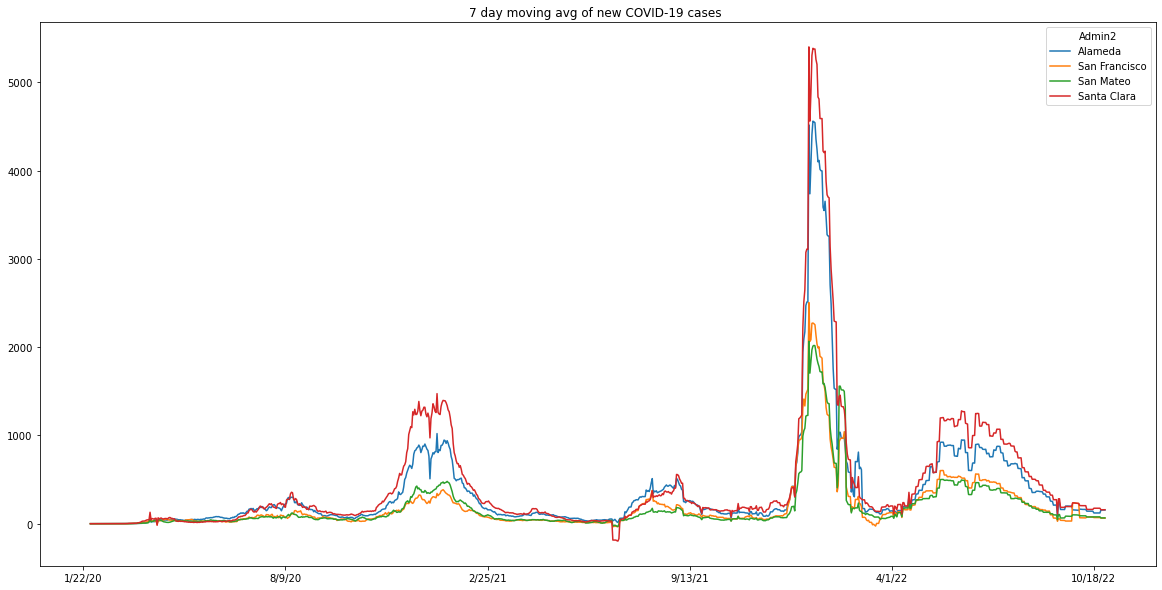

In [26]:
plot = cases_diff[counties].plot(figsize=(20,10))
plot.set_title("7 day moving avg of new COVID-19 cases ")

Text(0.5, 1.0, '7 day moving avg of new COVID-19 cases ')

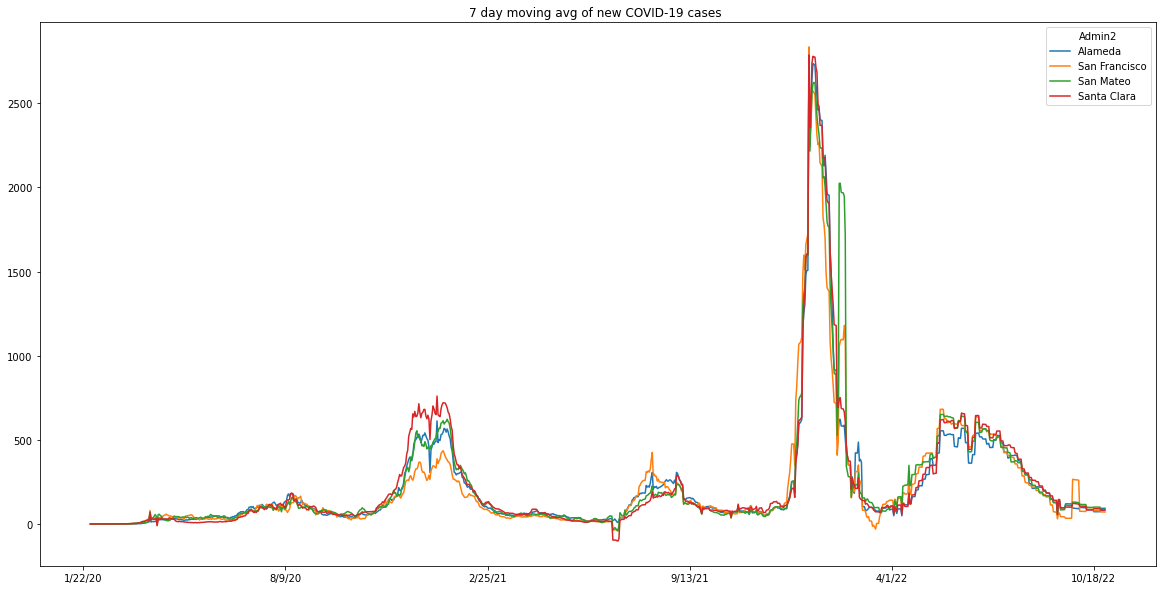

In [27]:
plot = cases_pm_diff[counties].plot(figsize=(20,10))
plot.set_title("7 day moving avg of new COVID-19 cases ")

Text(0.5, 1.0, 'Top 10 counties by COVID-19 cases per million inhabitants')

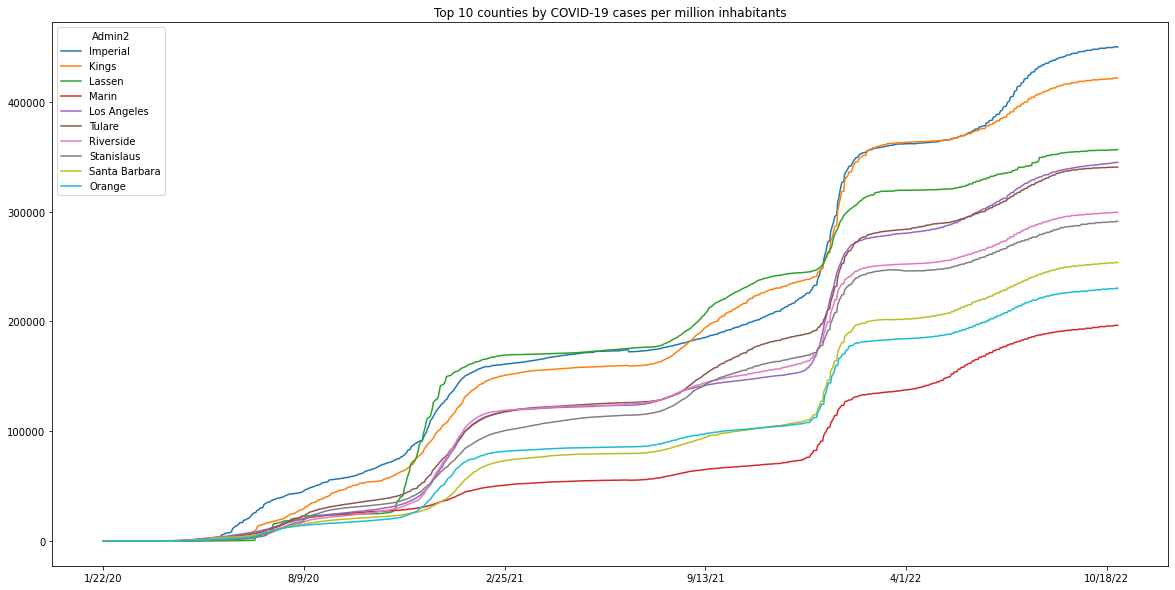

In [28]:
plot = cases_pm.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by COVID-19 cases per million inhabitants")

Text(0.5, 1.0, 'Top 10 counties by COVID-19 deaths per million inhabitants')

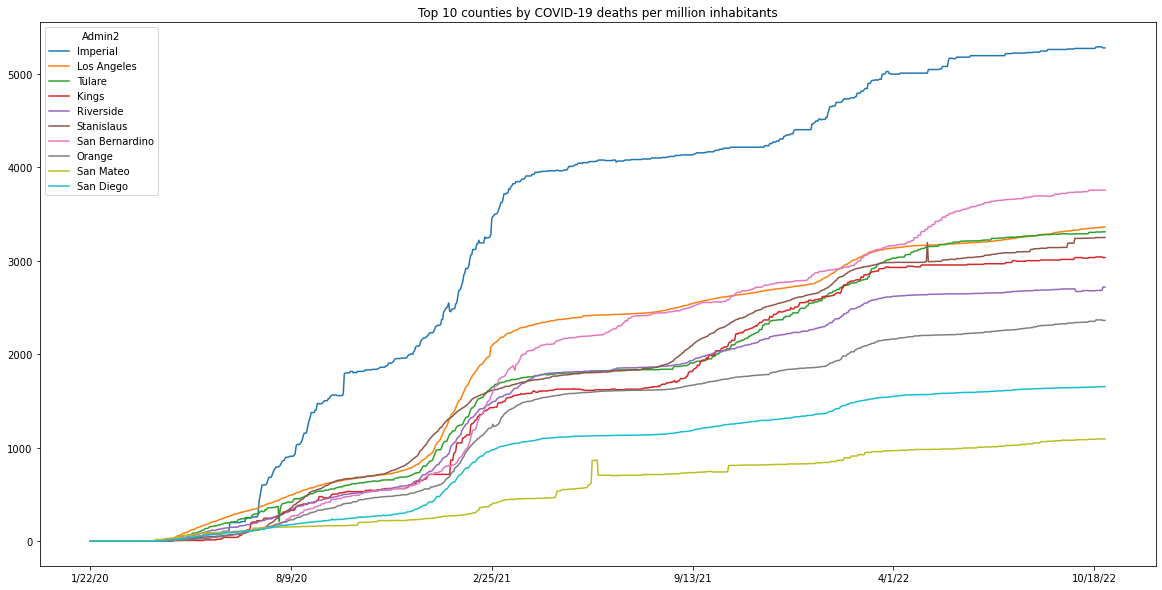

In [29]:
plot = deaths_pm.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by COVID-19 deaths per million inhabitants")

Text(0.5, 1.0, 'Top 10 counties by 7 day rolling avg COVID-19 case increases per million inhabitants')

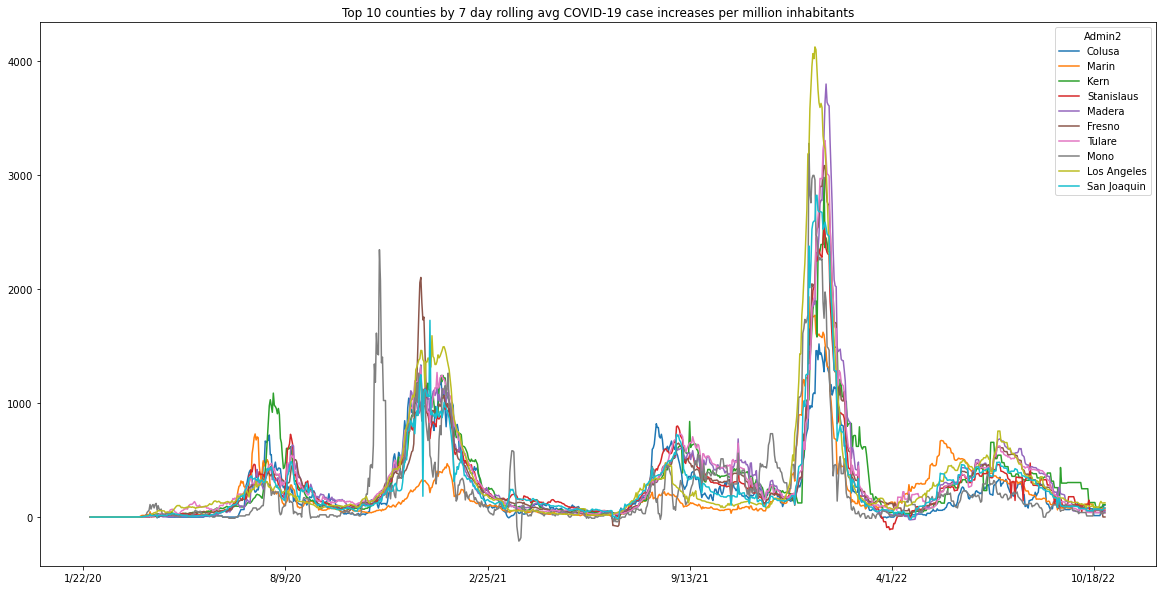

In [30]:
# one final graph we will look at was the top 10 counties by case increases and daily deaths per million:

plot = cases_pm_diff.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by 7 day rolling avg COVID-19 case increases per million inhabitants")

Text(0.5, 1.0, 'Top 10 counties by 7 day rolling avg COVID-19 daily deaths per million inhabitants')

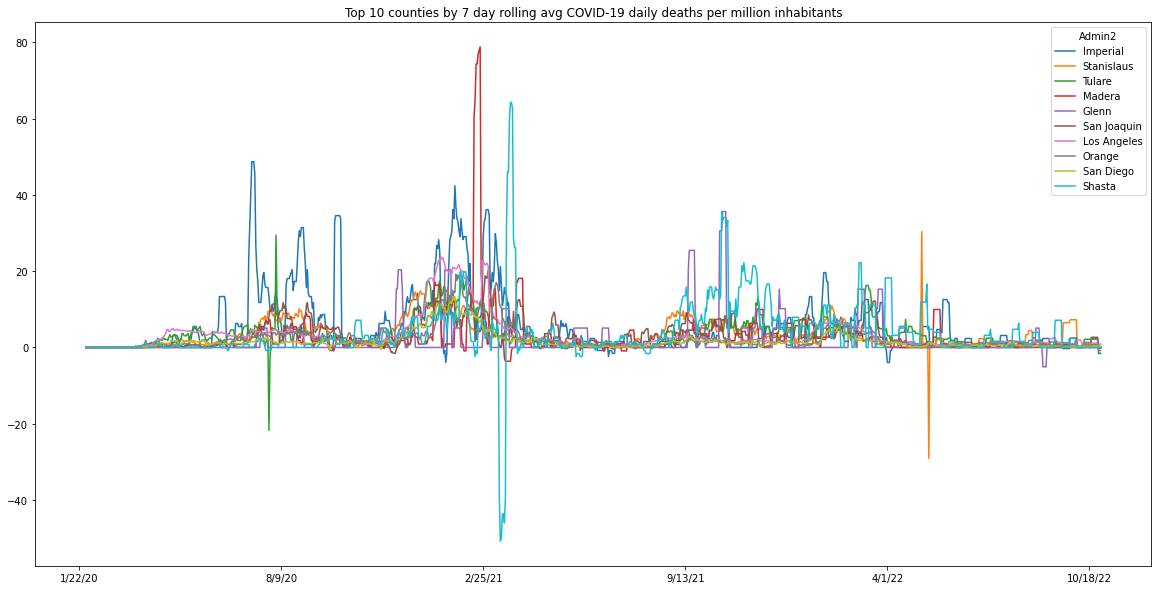

In [31]:
plot = deaths_pm_diff.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by 7 day rolling avg COVID-19 daily deaths per million inhabitants")